In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

# Linear regression and Polynomial regression

### Ground truth function

Data points written to data.csv


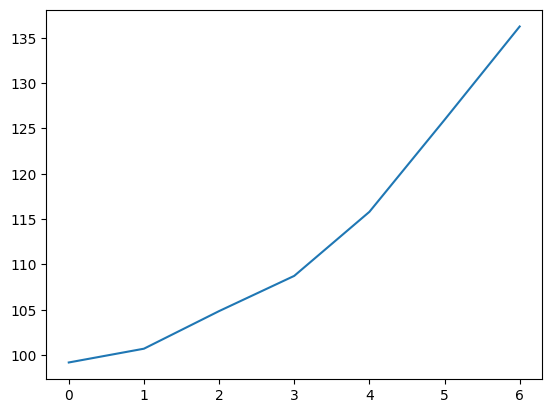

In [70]:
# Define the linear function
def linear(x):
    noise = 2*np.random.rand()
    return -1 + x**2 + noise + 100

# Generate points
data_points = []
for x in range(0,7):  # Generating points from 0 to 40
    y = linear(x)
    data_points.append(y)

# Write points to CSV file
np.savetxt('data.csv', data_points, fmt='%d', delimiter='\n')

print("Data points written to data.csv")
plt.plot(data_points)
plt.show()

### Predicting with linear regression (making functions easy to convert to Verilog)

In [ ]:
def partial_b(m,b,x,y):
    return 2*(b+m*x-y)

def partial_m(m,b,x,y):
    return 2*x*(b+m*x-y)

In [ ]:
# Read data from file
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))


alph = 0.0001 # Learning rate
b = 0
m = 0
iterations = 1000

predictions = []
psum_m = 0
psum_b = 0
for i in range(iterations):
    for j in range(len(d)):
        predictions.append(int(m*j+b))
    for j in range(len(d)):
        psum_m += int(partial_m(m,b,j,d[j]))
        psum_b += int(partial_m(m,b,j,d[j]))
    psum_m = int(psum_m/len(d))
    psum_b = int(psum_b/len(d))
    m = m - alph*psum_m
    b = b - alph*psum_b


print("m: " + str(m) + " b:" + str(b))


y_pred = []
for i in range(len(d)):
    y_pred.append(m*i+b)

plt.figure(figsize=(10, 5))  # Adjust the figure size if needed

# Plot truth
plt.plot(d, linestyle='-', label='Truth')

# Plot predicted
plt.plot(y_pred, linestyle='-', label='Predicted')

plt.title('Truth vs Predicted')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()  

plt.show()

### Predicting with 3 degree polynomial

In [ ]:
# cost function:            J = 1/n sum(i=0 to n)(h(x_i)-y_i)^2
# gradient descent:         th_j := th_j - alph dJ/dth

# partials
# batch size of 1
def partial_a0(a0,a1,a2,a3,x,y):
    return 2*(a0+a1*x+a2*np.power(x,2)+a3*np.power(x,3)-y)

def partial_a1(a0,a1,a2,a3,x,y):
    return 2*x*(a0+a1*x+a2*np.power(x,2)+a3*np.power(x,3)-y)

def partial_a2(a0,a1,a2,a3,x,y):
    return 2*np.power(x,2)*(a0+a1*x+a2*np.power(x,2)+a3*np.power(x,3)-y)

def partial_a3(a0,a1,a2,a3,x,y):
    return 2*np.power(x,3)*(a0+a1*x+a2*np.power(x,2)+a3*np.power(x,3)-y)

In [ ]:
# third order polynomial function
def poly3(a0,a1,a2,a3,x):
    return a0 + a1*x + a2*np.power(x,2) + a3*np.power(x,3)

0.45900000000000146
0.9960999999999929
1.8466999999999867
-0.1721999999999989


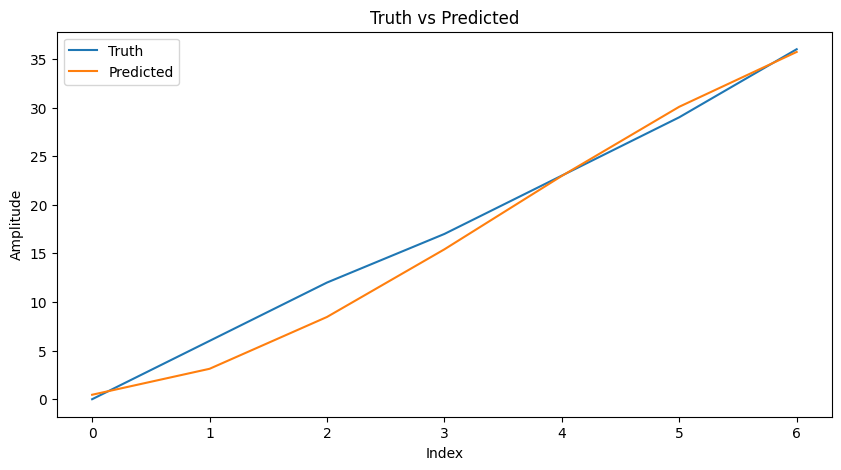

In [43]:
# Read data from file
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))


alph = 0.0001 # Learning rate
iterations = 1000
a0, a1, a2, a3 = 0,0,0,0
psum_a0, psum_a1, psum_a2, psum_a3 = 0,0,0,0

for i in range(iterations):
    for j in range(len(d)):
        psum_a0 += int(partial_a0(a0,a1,a2,a3,j,d[j]))
        psum_a1 += int(partial_a1(a0,a1,a2,a3,j,d[j]))
        psum_a2 += int(partial_a2(a0,a1,a2,a3,j,d[j]))
        psum_a3 += int(partial_a3(a0,a1,a2,a3,j,d[j])) 
    psum_a0 = int(psum_a0/len(d))
    psum_a1 = int(psum_a1/len(d))
    psum_a2 = int(psum_a2/len(d))
    psum_a3 = int(psum_a3/len(d))
    a0 = a0 - alph*psum_a0
    a1 = a1 - alph*psum_a1
    a2 = a2 - alph*psum_a2
    a3 = a3 - alph*psum_a3

print(a0)
print(a1)
print(a2)
print(a3)

y_pred = []
for i in range(len(d)):
    y_pred.append(poly3(a0,a1,a2,a3,i))

plt.figure(figsize=(10, 5))  # Adjust the figure size if needed

# Plot truth
plt.plot(d, linestyle='-', label='Truth')

# Plot predicted
plt.plot(y_pred, linestyle='-', label='Predicted')

plt.title('Truth vs Predicted')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()  

plt.show()

# ChatGPT method :\(

In [ ]:
# Read data from file
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))

y = d
X = np.arange(0,len(y))

# Initialize parameters
m = 0.5  # Initial slope
b = 1.0  # Initial y-intercept
learning_rate = 0.01
num_iterations = 1000

# Gradient Descent
for i in range(num_iterations):
    # Calculate predictions
    predictions = [m * xi + b for xi in X]

    # Calculate gradients
    dJ_dm = sum((predictions[i] - y[i]) * X[i] for i in range(len(X))) / len(X)
    dJ_db = sum(predictions[i] - y[i] for i in range(len(X))) / len(X)

    # Update parameters
    m -= learning_rate * dJ_dm
    b -= learning_rate * dJ_db

# Final parameters
print("Final slope (m):", m)
print("Final y-intercept (b):", b)

# Make predictions
new_X = np.arange(1,len(X))
predictions = [m * xi + b for xi in new_X]
print("Predictions for new data:", predictions)

# Plot signals on subplots
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
plt.subplot(2, 1, 1)
plt.plot(X, y, linestyle='-')
plt.title('Signal In')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(new_X, predictions, linestyle='-')
plt.title('Signal Out')
plt.xlabel('Index')
plt.ylabel('Amplitude')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [ ]:
# Read data from file
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))

y = d
X = np.arange(0,len(y))

# Normalize X (feature scaling)
X_normalized = (X - np.mean(X)) / np.std(X)

# Initialize parameters
a3 = 0.0
a2 = 0.0
a1 = 0.0
a0 = 0.0

# Hyperparameters
learning_rate = 0.001
num_iterations = 1000

# Gradient Descent
for _ in range(num_iterations):
    # Calculate predictions
    predictions = a3 * X_normalized**3 + a2 * X_normalized**2 + a1 * X_normalized + a0

    # Calculate gradients
    dJ_da3 = np.mean((predictions - y) * X_normalized**3)
    dJ_da2 = np.mean((predictions - y) * X_normalized**2)
    dJ_da1 = np.mean((predictions - y) * X_normalized)
    dJ_da0 = np.mean(predictions - y)

    # Update parameters
    a3 -= learning_rate * dJ_da3
    a2 -= learning_rate * dJ_da2
    a1 -= learning_rate * dJ_da1
    a0 -= learning_rate * dJ_da0

# Final parameters
print("Final coefficients:")
print(f"a3: {a3:.4f}, a2: {a2:.4f}, a1: {a1:.4f}, a0: {a0:.4f}")

# Plot the data and the fitted cubic function
plt.scatter(X, y, label="Data")
plt.plot(X, a3 * X_normalized**3 + a2 * X_normalized**2 + a1 * X_normalized + a0, color='red', label="Fitted Cubic Function")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Fitting a 3rd-degree Polynomial")
plt.legend()
plt.show()

# Verilog gradient descent

In [ ]:
# Compile Verilog files
compile_process = subprocess.run(["iverilog", "-g", "2012", "-o", "l", "LSR.sv", "LSR_tb.sv"], capture_output=True, text=True)

# Check if compilation was successful
if compile_process.returncode == 0:
    print("Compilation successful.")
else:
    print("Compilation failed.")
    print(compile_process.stderr)  # Print any error message from the compilation process

# Run the compiled file
if compile_process.returncode == 0:
    run_process = subprocess.run(["vvp", "l"], capture_output=True, text=True)
    
    # Print the output of the simulation
    print("Simulation output:")
    print(run_process.stdout)

In [ ]:
# Compile Verilog files
compile_process = subprocess.run(["iverilog", "-g", "2012", "-o", "l", "LSR_v2.sv", "LSR_tb.sv"], capture_output=True, text=True)

# Check if compilation was successful
if compile_process.returncode == 0:
    print("Compilation successful.")
else:
    print("Compilation failed.")
    print(compile_process.stderr)  # Print any error message from the compilation process

# Run the compiled file
if compile_process.returncode == 0:
    run_process = subprocess.run(["vvp", "l"], capture_output=True, text=True)
    
    # Print the output of the simulation
    print("Simulation output:")
    print(run_process.stdout)

In [ ]:
b=1
m=5

data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))
y = d
x = np.arange(0,len(y))
y_pred = m*x + b


plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Verilog polynomial descent

In [75]:
# Compile Verilog files
compile_process = subprocess.run(["iverilog", "-g", "2012", "-o", "l", "LSR_v3.sv", "LSR_tb.sv"], capture_output=True, text=True)

# Check if compilation was successful
if compile_process.returncode == 0:
    print("Compilation successful.")
else:
    print("Compilation failed.")
    print(compile_process.stderr)  # Print any error message from the compilation process

# Run the compiled file
if compile_process.returncode == 0:
    run_process = subprocess.run(["vvp", "l"], capture_output=True, text=True)
    
    # Print the output of the simulation
    print("Simulation output:")
    print(run_process.stdout)

Compilation successful.
Simulation output:
a0: 100.003114, a1: 0.011931, a2: 0.044407, a3: 0.170600, val: 105.000000
LSR_tb.sv:65: $finish called at 1000010100000 (1ps)



100.003114 0.011931 0.044407 0.1706


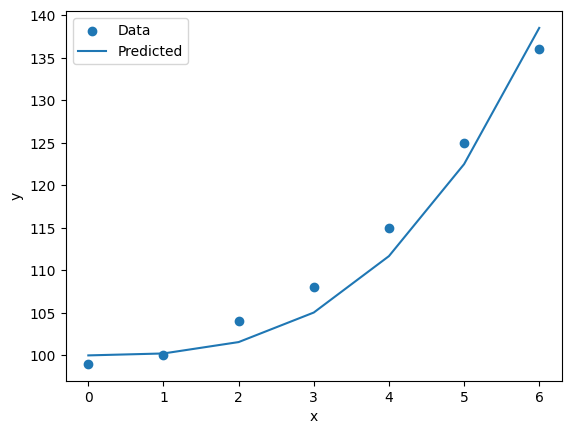

In [76]:
data_file = "data.csv"
with open(data_file, "r") as file:
    lines = file.readlines()
d = []
for line in lines:
    d.append(int(line))
y = d

coeffs_file = "coeffs.txt"
with open(coeffs_file, "r") as file:
    lines = file.readlines()
coeffs = []
for line in lines:
    coeffs.append(float(line))
x = np.arange(0,len(y))
a0 = coeffs[0]
a1 = coeffs[1]
a2 = coeffs[2]
a3 = coeffs[3]
y_pred = a0 + a1*x + a2*x**2 + a3*x**3

print(str(a0) + " " + str(a1) + " " + str(a2) + " " + str(a3))



plt.scatter(x, y, label="Data")
plt.plot(x, y_pred, label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()